## Part 1

With the toboggan login problems resolved, you set off toward the airport. While travel by toboggan might be easy, it's certainly not safe: there's very minimal steering and the area is covered in trees. You'll need to see which angles will take you near the fewest trees.

Due to the local geology, trees in this area only grow on exact integer coordinates in a grid. You make a map (your puzzle input) of the open squares (.) and trees (#) you can see. For example:

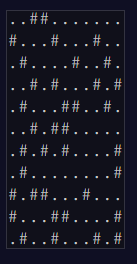


These aren't the only trees, though; due to something you read about once involving arboreal genetics and biome stability, the same pattern repeats to the right many times:

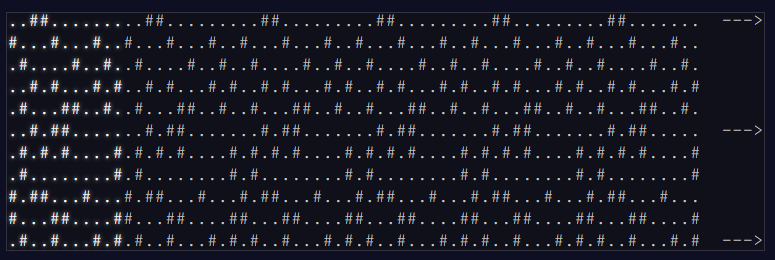

You start on the open square (.) in the top-left corner and need to reach the bottom (below the bottom-most row on your map).

The toboggan can only follow a few specific slopes (you opted for a cheaper model that prefers rational numbers); start by counting all the trees you would encounter for the slope right 3, down 1:

From your starting position at the top-left, check the position that is right 3 and down 1. Then, check the position that is right 3 and down 1 from there, and so on until you go past the bottom of the map.

The locations you'd check in the above example are marked here with O where there was an open square and X where there was a tree:

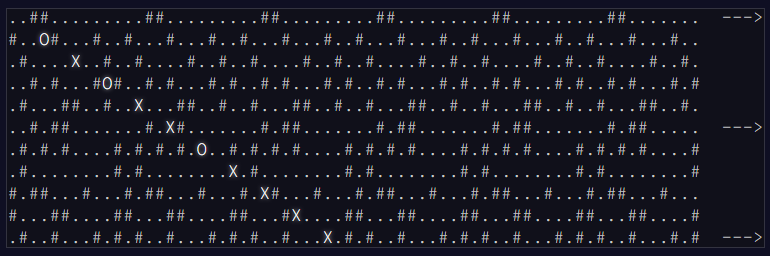

In this example, traversing the map using this slope would cause you to encounter 7 trees.

Starting at the top-left corner of your map and following a slope of right 3 and down 1, how many trees would you encounter?

In [198]:
def read_file(file):
    with open(file, "r") as f:
        l = f.read()
        l = l.splitlines()
    return l

In [199]:
def encounters(data, right, down):
    x = 0
    y = 0
    trees = 0
    while y < len(data):
        y += down
        if y >= len(data):
            break
        x = (x + right) % len(data[y])    
        if data[y][x] == "#":
            trees += 1
    return trees

In [200]:
lines = read_file("2020_day3.txt")
print(encounters(lines, 3, 1))

207


## Part 2

Time to check the rest of the slopes - you need to minimize the probability of a sudden arboreal stop, after all.

Determine the number of trees you would encounter if, for each of the following slopes, you start at the top-left corner and traverse the map all the way to the bottom:

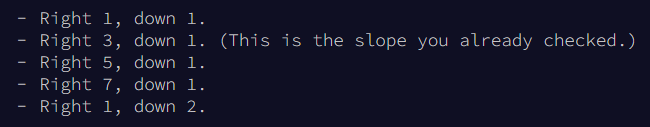

In the above example, these slopes would find 2, 7, 3, 4, and 2 tree(s) respectively; multiplied together, these produce the answer 336.

What do you get if you multiply together the number of trees encountered on each of the listed slopes?

In [205]:
count = 1
lines = read_file("2020_day3.txt")
slopes = [[1,1],[1,3],[1,5],[1,7],[2,1]]

for slope in slopes:
    enc = encounters(lines, slope[1], slope[0])
    count *= enc
print(count)

2655892800
